In [3]:
import os
import subprocess
# Clone the repo and set the main directory
def git_clone(repo_url, target_directory):
    # Create the target directory if it doesn't exist
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    # Change directory to the target directory
    os.chdir(target_directory)

    # Git clone command
    subprocess.run(["git", "clone", repo_url])

# GitHub repository URL
repo_url = "https://github.com/TRG-AI4Good/RAPID_A.git"  # Replace with your repository URL

# Target directory where you want to clone the repository
cwd='C:/Users/solei/Documents/GitHub/'  # Replace with your desired directory path

# Clone the repository
git_clone(repo_url, cwd)
cwd='C:/Users/solei/Documents/GitHub/'
os.chdir(cwd)
cwd=os.getcwd()+'/'
cwd+='RAPID_A/'
os.chdir(cwd)
cwd=os.getcwd()

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [4]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available.")
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")
    # Get the name of the current CUDA device
    current_device = torch.cuda.current_device()
    print(f"Current CUDA device name: {torch.cuda.get_device_name(current_device)}")
else:
    print("CUDA is not available. Using CPU.")


CUDA is available.
Number of GPUs available: 1
Current CUDA device name: NVIDIA GeForce RTX 4090 Laptop GPU


In [1]:
'''
This initialization automatically downloads the required data, listed as follows:

Data
│

1- Block Boundaries 

│── CSVS
│       └── Blocks_geom1.parquet
        └── Blocks_geom*.parquet

2- Google (post-event) and Bing (pre-event) Lahaina satellite images

│── CM_G_Concat
│       └── 1.png
        └── *.png

3- Deep segmentation models trained on Maras data (6 models with different channel augmnettaion and archi.)

│── Deep_Models
│       └── Model_2E_Eff.pth
│       └── *.pth

4- Lahaina ARIA tiff file

└── ARIA.tif

5- Inventory (we have many attributed there by combining FEMA+MIcrosoft+NSI, but the only required data is building footrpint geo-polygons

└── Inventory.pqrquet

6- Labels (optional): Labels for each of the inventory footprints 0: No damage, 1: D damage, 2: C damage

└── Geom_Labels.parquet

'''

from Main import RAPID_A
A=RAPID_A(cwd,640,640)

  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


  Cloning https://github.com/qubvel/segmentation_models.pytorch to c:\users\solei\appdata\local\temp\pip-req-build-obwyja85



NameError: name 'cwd' is not defined

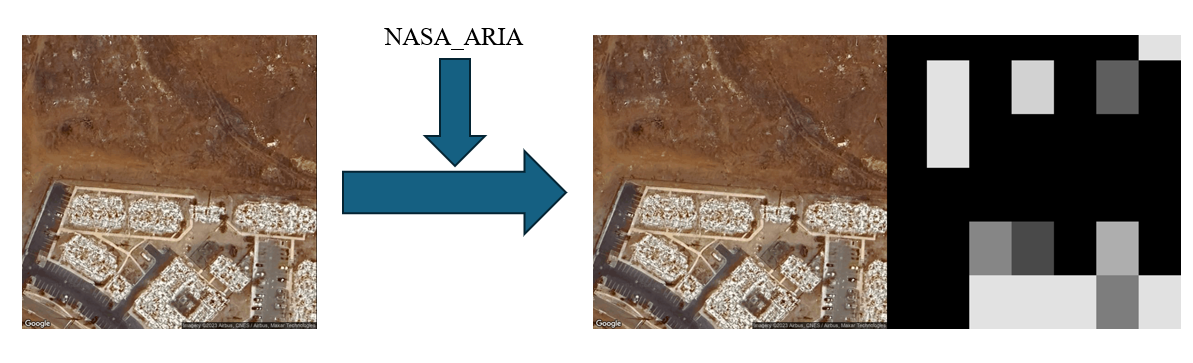

In [ ]:
# Extract ARIA maps
'''
│── Data
│   └── G_Plus_ARIA
│       └── 1.png
│       └── 2.ong
'''
A.ARIA_maps()

Buiding block-wise ARIA maps:   0%|          | 0/1551 [00:00<?, ?it/s]

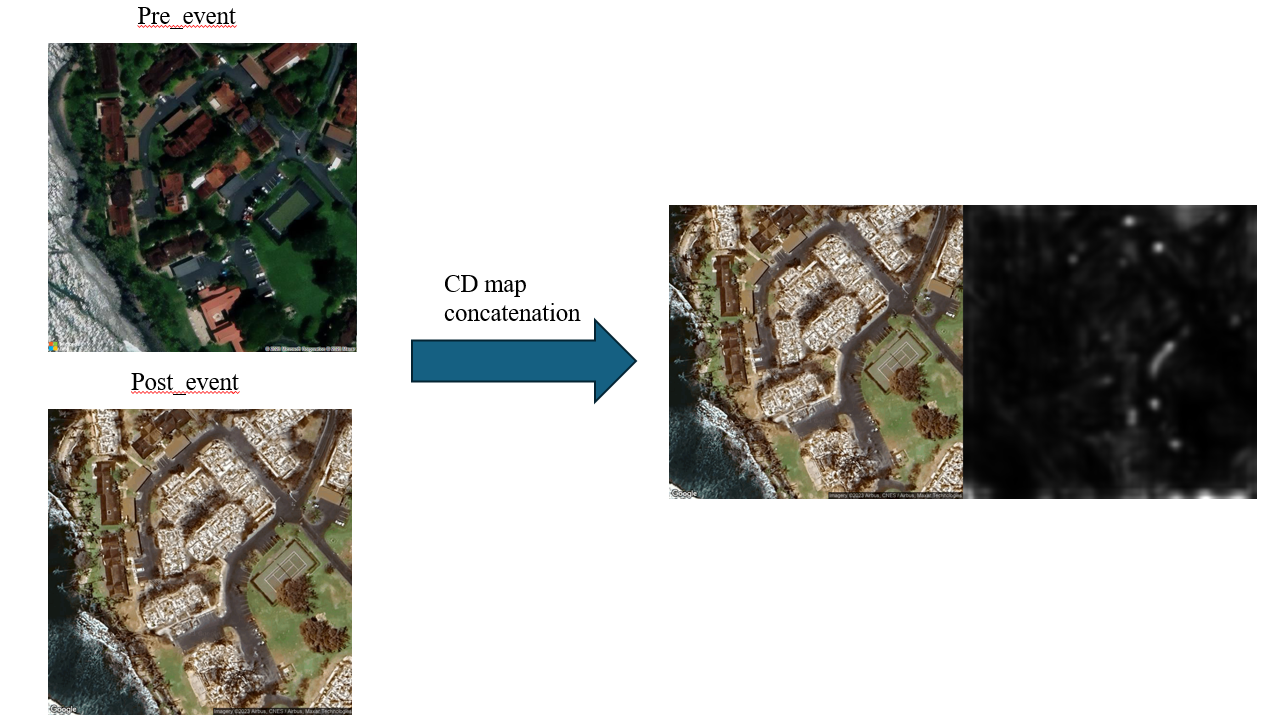

In [5]:
# Extract CD maps
'''
│── Data
│   └── G_Plus_CD
│       └── 1.png
│       └── 2.ong
'''
A.CD_maps()

Buiding block-wise CD maps:   0%|          | 0/1551 [00:00<?, ?it/s]

In [8]:
# Run ineference for models
'''
As outlined in the manuscript, there exists 6 models (CNN or Vit) * (normal, CD, and ARIA augmented inputs) and for each of C and D labels
│── Deep Models
│   └── Model-2E_Eff (C or D): CNN-based Efficient Net
│   └── Model-2E_Eff_CD (C or D): CNN-based Efficient Net
│   └── Model-2E_Eff_ARIA (C or D): CNN-based Efficient Net
│   └── Model-2E_Tra (C or D): CNN-based
│   └── Model-2E-Tra-CD (C or D): Vit-based 
│   └── Model-2E_Tra-ARIA (C or D): Vit-based 
'''
Models=['Model_2E_Eff','Model_2E_Eff_CD','Model_2E_Eff_ARIA','Model_2E_Tra','Model_2E_Tra_CD','Model_2E_Tra_ARIA']
## Building masks
A.Model_Mask(Models,['C','D'])

Model_2E_Eff's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

In [9]:
## Transforming segmentation masks into geo-polygons
'''
This module transformes all segemntation pieces in block images into geo-polygons and then merge all of them
into a single parquet file geometry for C and D damages
│── Results
│   └── Model-X
│       └── Shape_Files
│           └── D.aprquet
│           └── C.aprquet
'''
A.Mask_To_Poly(Models,['C','D'])

Masks to polygon for Model_2E_Eff Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Eff Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Eff_CD Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Eff_CD Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Eff_ARIA Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Eff_ARIA Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra_CD Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra_CD Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra_ARIA Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Model_2E_Tra_ARIA Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]


 Accuracy estimation:
| Overlap Threshold   |   C Category |   D Category |
|---------------------+--------------+--------------|
| >10                 |           96 |          415 |
| >20                 |           82 |          375 |
| >30                 |           70 |          344 |
| >40                 |           64 |          310 |
| >50                 |           59 |          280 |
| >60                 |           47 |          240 |
| >70                 |           43 |          202 |
| >80                 |           31 |          156 |
| >90                 |           22 |          118 |


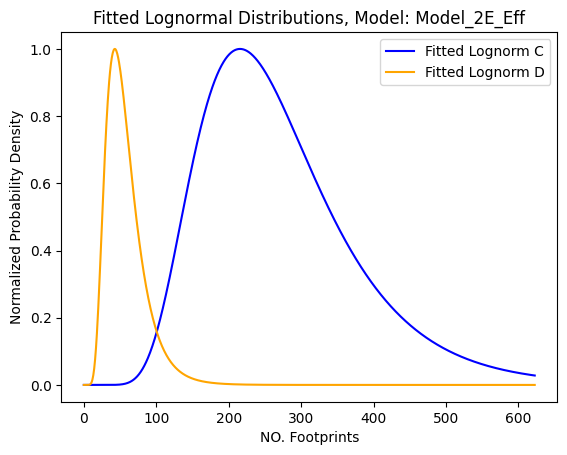

Labels are given, accuracy estimatation begins:
Model_2E_Eff's binary damage detection P-R-F1 scores=
 No damage: 2328 	Damage: 429
 Prec:	 0.6785109220676231 
 Recall:	 0.6104199750769863 
 F1:	 0.4477704681117765 

Model_2E_Eff's damage severity detection P-R-F1 scores=
 No: 2328 D damage: 73 	C Damage: 356
 Prec:	 0.5269539769963439 
 Recall:	 0.42467570257328296 
 F1:	 0.32695310384824167 


 Accuracy estimation:
| Overlap Threshold   |   C Category |   D Category |
|---------------------+--------------+--------------|
| >10                 |          147 |          717 |
| >20                 |          131 |          679 |
| >30                 |          121 |          636 |
| >40                 |          104 |          598 |
| >50                 |           95 |          560 |
| >60                 |           84 |          513 |
| >70                 |           67 |          461 |
| >80                 |           55 |          413 |
| >90                 |           41 | 

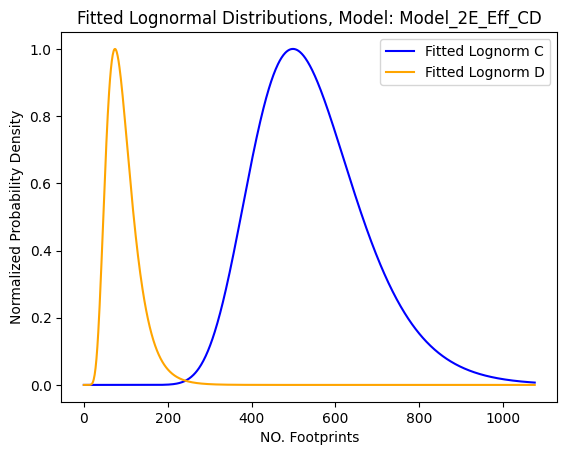

Labels are given, accuracy estimatation begins:
Model_2E_Eff_CD's binary damage detection P-R-F1 scores=
 No damage: 1971 	Damage: 786
 Prec:	 0.7043165983090692 
 Recall:	 0.6960448341727715 
 F1:	 0.5830581288905765 

Model_2E_Eff_CD's damage severity detection P-R-F1 scores=
 No: 1971 D damage: 123 	C Damage: 663
 Prec:	 0.5035169020808716 
 Recall:	 0.47672509591100914 
 F1:	 0.4071475583561897 


 Accuracy estimation:
| Overlap Threshold   |   C Category |   D Category |
|---------------------+--------------+--------------|
| >10                 |            6 |          657 |
| >20                 |            7 |          602 |
| >30                 |            8 |          563 |
| >40                 |            7 |          529 |
| >50                 |            5 |          475 |
| >60                 |            4 |          440 |
| >70                 |            2 |          369 |
| >80                 |            1 |          314 |
| >90                 |          

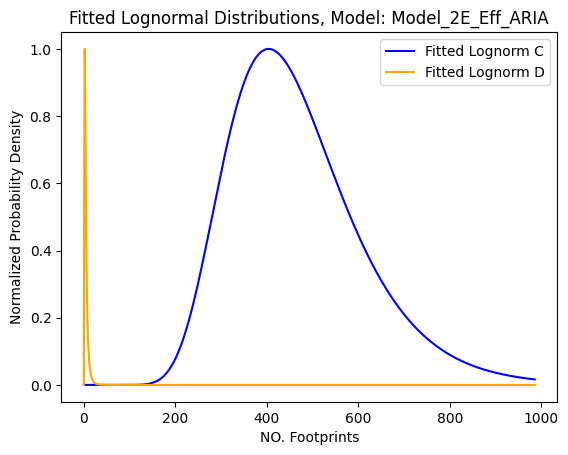

Labels are given, accuracy estimatation begins:
Model_2E_Eff_ARIA's binary damage detection P-R-F1 scores=
 No damage: 2165 	Damage: 592
 Prec:	 0.6927680856376006 
 Recall:	 0.653023216059736 
 F1:	 0.5153561272271011 

Model_2E_Eff_ARIA's damage severity detection P-R-F1 scores=
 No: 2165 D damage: 7 	C Damage: 585
 Prec:	 0.5570700106496873 
 Recall:	 0.45297987916240184 
 F1:	 0.36550924675344515 


 Accuracy estimation:
| Overlap Threshold   |   C Category |   D Category |
|---------------------+--------------+--------------|
| >10                 |          972 |          471 |
| >20                 |          941 |          403 |
| >30                 |          926 |          345 |
| >40                 |          901 |          300 |
| >50                 |          867 |          259 |
| >60                 |          821 |          212 |
| >70                 |          762 |          174 |
| >80                 |          702 |          126 |
| >90                 |        

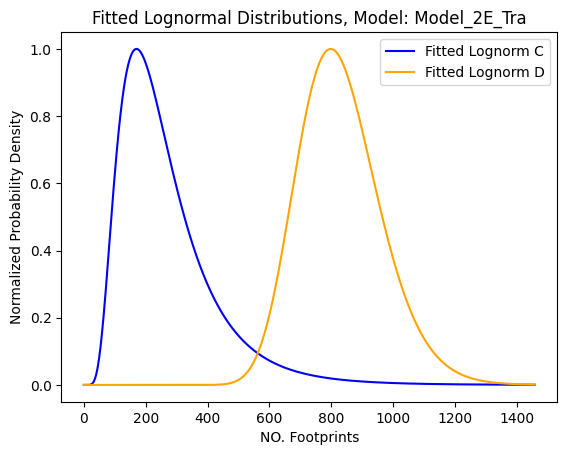

Labels are given, accuracy estimatation begins:
Model_2E_Tra's binary damage detection P-R-F1 scores=
 No damage: 1446 	Damage: 1311
 Prec:	 0.73003013125453 
 Recall:	 0.7700836506516897 
 F1:	 0.7117140008885325 

Model_2E_Tra's damage severity detection P-R-F1 scores=
 No: 1446 D damage: 940 	C Damage: 371
 Prec:	 0.5465966275271475 
 Recall:	 0.5106525428535628 
 F1:	 0.40321462525344004 


 Accuracy estimation:
| Overlap Threshold   |   C Category |   D Category |
|---------------------+--------------+--------------|
| >10                 |          294 |         1028 |
| >20                 |          290 |          984 |
| >30                 |          287 |          931 |
| >40                 |          284 |          870 |
| >50                 |          271 |          805 |
| >60                 |          257 |          730 |
| >70                 |          239 |          653 |
| >80                 |          221 |          539 |
| >90                 |          176 |  

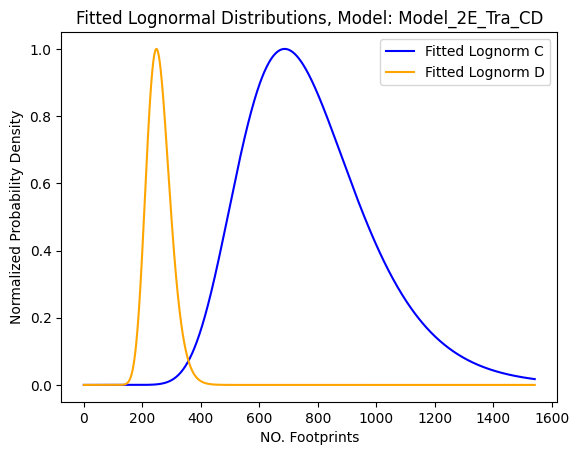

Labels are given, accuracy estimatation begins:
Model_2E_Tra_CD's binary damage detection P-R-F1 scores=
 No damage: 1515 	Damage: 1242
 Prec:	 0.760232617464645 
 Recall:	 0.8032763481591406 
 F1:	 0.7329179344171326 

Model_2E_Tra_CD's damage severity detection P-R-F1 scores=
 No: 1515 D damage: 287 	C Damage: 955
 Prec:	 0.5830973636794878 
 Recall:	 0.5931947098389921 
 F1:	 0.5491300059421417 


 Accuracy estimation:
| Overlap Threshold   |   C Category |   D Category |
|---------------------+--------------+--------------|
| >10                 |          124 |          684 |
| >20                 |          106 |          624 |
| >30                 |           96 |          576 |
| >40                 |           85 |          515 |
| >50                 |           73 |          461 |
| >60                 |           62 |          392 |
| >70                 |           47 |          331 |
| >80                 |           38 |          262 |
| >90                 |           

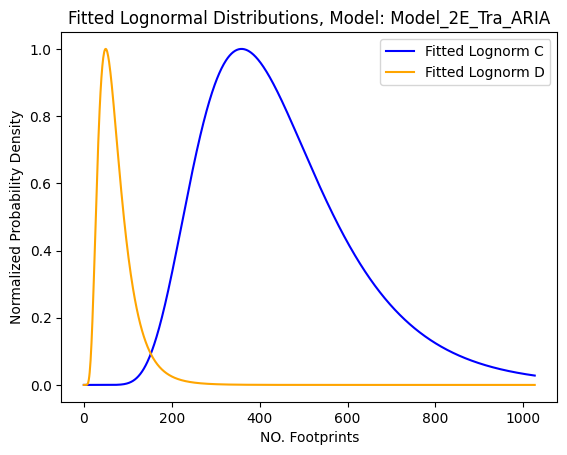

Labels are given, accuracy estimatation begins:
Model_2E_Tra_ARIA's binary damage detection P-R-F1 scores=
 No damage: 2050 	Damage: 707
 Prec:	 0.6773201780108324 
 Recall:	 0.6591746914971893 
 F1:	 0.5396685429712434 

Model_2E_Tra_ARIA's damage severity detection P-R-F1 scores=
 No: 2050 D damage: 100 	C Damage: 607
 Prec:	 0.6123577235772358 
 Recall:	 0.4996059849569403 
 F1:	 0.4473327616658369 



In [10]:
# Mathcing segmentation geo-polygons with the building footprints
'''
This also outputs the inventory parquet with two new columns PD and PC that shows
the resulting overlapping ratio, upon which various illustration in the manuscript
can be drawn
into a single parquet file geometry for C and D damages
│── Results
│   └── Model-X
│       └── Shape_Files
│           └── D.aprquet
│           └── C.aprquet
'''
Models=['Model_2E_Eff','Model_2E_Eff_CD','Model_2E_Eff_ARIA','Model_2E_Tra','Model_2E_Tra_CD','Model_2E_Tra_ARIA']
A.Poly_to_Matching(Models,T=0.25)

Ensemble for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Ensemble for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Ensemble Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for Ensemble Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]


 Accuracy estimation:
| Overlap Threshold   |   C Category |   D Category |
|---------------------+--------------+--------------|
| >10                 |           86 |         1138 |
| >20                 |           79 |         1099 |
| >30                 |           75 |         1051 |
| >40                 |           73 |         1008 |
| >50                 |           72 |          947 |
| >60                 |           68 |          893 |
| >70                 |           59 |          810 |
| >80                 |           45 |          720 |
| >90                 |           27 |          588 |


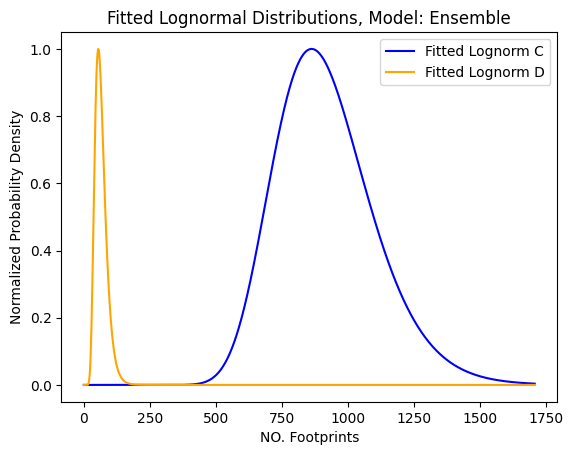

Labels are given, accuracy estimatation begins:
Ensemble's binary damage detection P-R-F1 scores=
 No damage: 1602 	Damage: 1155
 Prec:	 0.7574606417303047 
 Recall:	 0.795051567845844 
 F1:	 0.7156416936999556 

Ensemble's damage severity detection P-R-F1 scores=
 No: 1602 D damage: 77 	C Damage: 1078
 Prec:	 0.6309684014338911 
 Recall:	 0.583480242057191 
 F1:	 0.5465520047336729 



In [11]:
# Ensemble of Six models: (Alg 1) in paper
'''
This module ensembles the six initial models, saving the resulting
segmentation masks as follows
into a single parquet file geometry for C and D damages
│── Results
│   └── Ensemble
│       └── Mask_Results_C
│       └── Mask_Results_D

Masks also transformed into polygons, saved as
│── Results
│   └── Ensemble
│       └── Shape_Files
│           └── C.parquet
│           └── D.parquet
'''
A.Ensemble(['C','D'])
# And, assessment is followed as:
A.Poly_to_Matching(['Ensemble'],T=0.25)

In [15]:
A.Model_Mask(Models,['C','D'],rotate=True)

Model_2E_Eff's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_CD's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Eff_ARIA's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_CD's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 0:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 90:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 180:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	C, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

Model_2E_Tra_ARIA's Mask Generatrion for:	D, rotation= 270:   0%|          | 0/1551 [00:00<?, ?it/s]

In [19]:
# Performing the TTA strategy 
'''
This module inputs input data under four rotations of 
0, 90, 180, and 270 degrees to all models ans save
results as follows:

│── Results
│   └── Model-x
│       └── Mask_Results_C-0
│       └── Mask_Results_D-90
        etc.

and then, buuild the model Ensemble-R folder with the 
ensmebled TTA outcomes for the final assessment in:

│── Results
│   └── EnsembleR
│       └── Mask_Results_C
│       └── Mask_Results_D
        etc.
'''
A.Rotation_Ens(Models,['C','D'])

Ensemble across rotations:


Ensemble across rotations:   0%|          | 0/6 [00:00<?, ?it/s]

Ensemble for:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Ensemble for:	C:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for EnsembleR Damage case:	D:   0%|          | 0/1551 [00:00<?, ?it/s]

Masks to polygon for EnsembleR Damage case:	C:   0%|          | 0/1551 [00:00<?, ?it/s]


 Accuracy estimation:
| Overlap Threshold   |   C Category |   D Category |
|---------------------+--------------+--------------|
| >10                 |          345 |         1461 |
| >20                 |          331 |         1415 |
| >30                 |          316 |         1380 |
| >40                 |          302 |         1340 |
| >50                 |          289 |         1289 |
| >60                 |          278 |         1214 |
| >70                 |          258 |         1148 |
| >80                 |          239 |         1027 |
| >90                 |          192 |          878 |


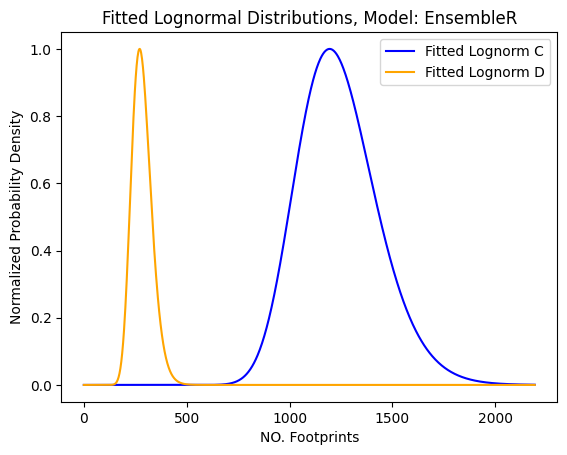

Labels are given, accuracy estimatation begins:
EnsembleR's binary damage detection P-R-F1 scores=
 No damage: 1042 	Damage: 1715
 Prec:	 0.8587069047525784 
 Recall:	 0.8970216255453458 
 F1:	 0.8718687923900474 

EnsembleR's damage severity detection P-R-F1 scores=
 No: 1042 D damage: 319 	C Damage: 1396
 Prec:	 0.792821582862946 
 Recall:	 0.8440645070085866 
 F1:	 0.8112712983312608 



In [20]:
# Finally, the EnsembleR assessment:
A.Poly_to_Matching(['EnsembleR'],T=0.25)